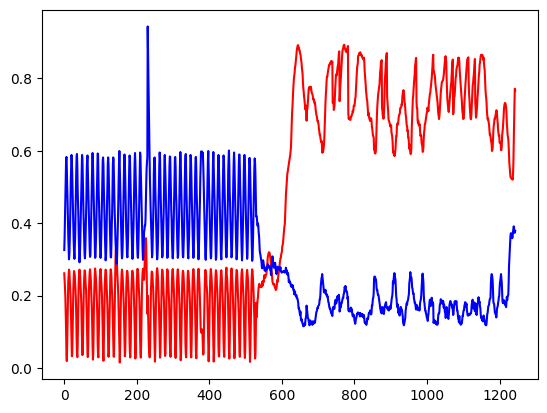

In [17]:
from importlib.resources import path
from re import L
# from turtle import position
import xml.etree.ElementTree as ET
import os
import matplotlib.pyplot as plt


path = "/home/wang/yolov5/VOCData_AB/labels"
files = os.listdir(path)

lable = []

file_name = []


for file in files :
    file = file.replace('test_','')
    file = file.replace('.txt','')
    
    file_name.append(int(file))
    # position = path + '\\' + file
    file_name.sort()

for i in file_name:
    position = path + '/' + 'test_' + str(i) + '.txt'
    with open (position,"r") as f :
        for line in f.readlines():
            data = line.split()
            lable.append(data)

lable_float = []
x_center = []
y_center = []

for j in lable :
    list_float = []
    for k in j:
        list_float.append(float(k))
    lable_float.append(list_float)
    x_center.append(list_float[1])
    y_center.append(list_float[2])

plt.plot(x_center,"red")
plt.plot(y_center,"blue")

plt.show()

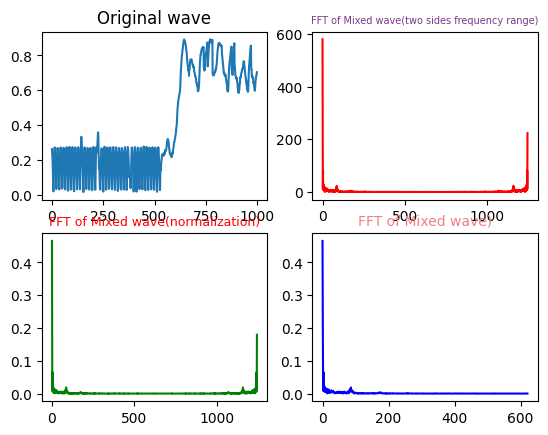

In [18]:
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import seaborn



x=np.arange(0,len(x_center),1)      

y=np.array(x_center)

yy=fft(y)                     
yreal = yy.real               
yimag = yy.imag               

yf=abs(fft(y))                
yf1=abs(fft(y))/len(x)           
yf2 = yf1[range(int(len(x)/2))]  

xf = np.arange(len(y))        
xf1 = xf
xf2 = xf[range(int(len(x)/2))]  


plt.subplot(221)
plt.plot(x[0:1000],y[0:1000])   
plt.title('Original wave')

plt.subplot(222)
plt.plot(xf,yf,'r')
plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B')  #注意这里的颜色可以查询颜色代码表

plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')

plt.subplot(224)
plt.plot(xf2,yf2,'b')
plt.title('FFT of Mixed wave)',fontsize=10,color='#F08080')


plt.show()

In [19]:
import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
import seaborn

def plot_FFT(x,y):
    yy=fft(y)                     
    yreal = yy.real               
    yimag = yy.imag               

    yf=abs(fft(y))                
    yf1=abs(fft(y))/len(x)           
    yf2 = yf1[range(int(len(x)/2))]  

    xf = np.arange(len(y))        
    xf1 = xf
    xf2 = xf[range(int(len(x)/2))]  


    plt.subplot(221)
    plt.plot(x[0:1000],y[0:1000])   
    plt.title('Original wave')

    # plt.subplot(222)
    # plt.plot(xf,yf,'r')
    # plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B')  #注意这里的颜色可以查询颜色代码表

    # plt.subplot(223)
    # plt.plot(xf1,yf1,'g')
    # plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')

    plt.subplot(222)
    plt.plot(xf2[1:],yf2[1:],'b')
    plt.title('FFT of Mixed wave)',fontsize=10,color='#F08080')


    plt.show()
    return yf2





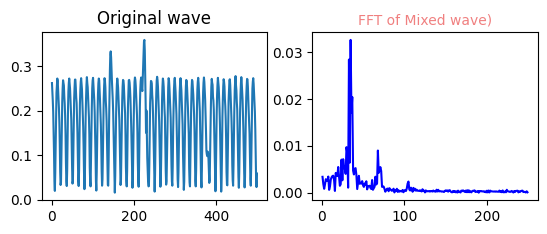

In [31]:
x_A = x_center[:500]

x=np.arange(0,len(x_A),1)      
y=np.array(x_A)


x_A_FFT = plot_FFT(x,y)

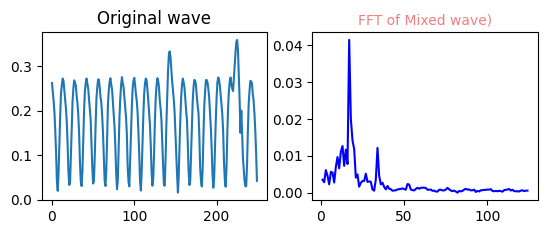

In [21]:
x_A_1 = x_A[:250]

x=np.arange(0,len(x_A_1),1)      
y=np.array(x_A_1)

x_A_1_FFT = plot_FFT(x,y)

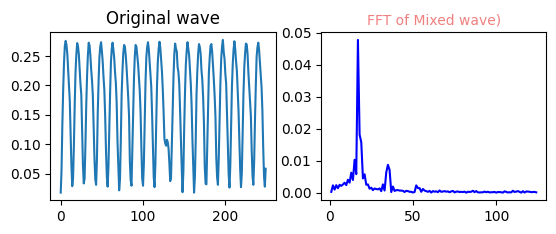

In [22]:
x_A_2 = x_A[250:]

x=np.arange(0,len(x_A_2),1)      
y=np.array(x_A_2)

x_A_2_FFT = plot_FFT(x,y)

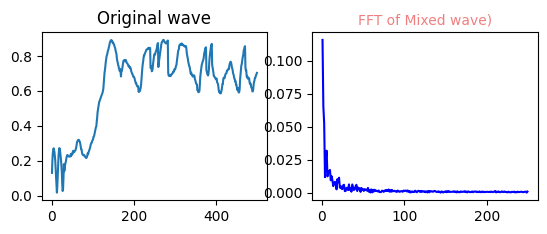

In [32]:
x_B = x_center[500:1000]

x=np.arange(0,len(x_B),1)      
y=np.array(x_B)

x_B_FFT = plot_FFT(x,y)

In [26]:
from scipy.special import rel_entr

def KL_Divergence(x,y):
    return sum(rel_entr(x, y))


In [27]:
print(KL_Divergence(x_A_1_FFT,x_A_2_FFT))

0.19841564980295262


In [34]:
print(KL_Divergence(x_B_FFT,x_A_FFT))

2.2349487681706353
